In [1]:
import ipywidgets as w
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
def sigma(L,gamma,N,x):
    return L/(gamma*np.sqrt(N)) * (1 + np.square((2*x)/L))

def CRB(L,gamma,N,x, sig = None, depth:int = 0, ter:int = 1):
    if depth == ter:
        return sig
    elif depth == 0:
        return CRB(L,gamma,N,x, sig = sigma(L,gamma,N,x), depth = depth + 1, ter = ter)
    else:
        return CRB(L,gamma,N,x, sig = sigma(3*sig,gamma,N,x), depth = depth + 1, ter = ter)

In [57]:
CRB(100, 4, 10, 50, sig = None, ter = 8)

18.621507516298855

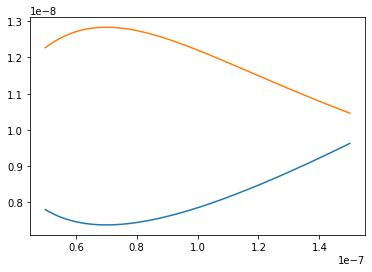

In [37]:
z = np.linspace(50e-9,150e-9, 1000)
plt.plot(z,sigma(z,6,10,35e-9))
plt.plot(z,sigma(3*sigma(z,6,10,35e-9),6,10,35e-9))

In [3]:
term = w.RadioButtons(
    options=['Scan Diam', 'Phot Lim', 'offset'],
    description='Select axis:',
    disabled=False
)
display(term)

RadioButtons(description='Select axis:', options=('Scan Diam', 'Phot Lim', 'offset'), value='Scan Diam')

In [4]:
if term.value == 'Scan Diam':
    L = w.IntRangeSlider(
    value=[1,100],
    min=1,
    max=500,
    step=10,
    description='Scan diameter [nm]:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
else:
    L = w.IntSlider(
        value=100,
        min=0,
        max=500,
        step=10,
        description='Scan diameter [nm]:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )


gamma = w.IntSlider(
    value=4,
    min=0,
    max=12,
    step=1,
    description='Geo Factor [a.u.]:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
if term.value == 'Phot Lim':
    N = w.IntRangeSlider(
    value=[1,50],
    min=1,
    max=500,
    step=10,
    description='Detected photons [a.u.]:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
    
else:
    N = w.IntSlider(
        value=50,
        min=10,
        max=500,
        step=10,
        description='Detected photons [a.u.]:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

if term.value == 'offset':
    x = w.FloatRangeSlider(
    value=[0, 35],
    min=0,
    max=100,
    step=0.5,
    description='Center offset [nm]:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
    
else:
    x = w.IntSlider(
        value=10,
        min=0,
        max=100,
        step=1,
        description='Center offset [nm]:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )


ter = w.IntRangeSlider(
    value=[1,10],
    min=1,
    max=10,
    step=1,
    description='# iterations:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [ ]:
L

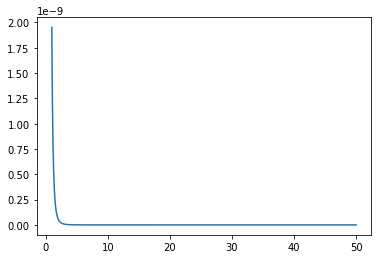

In [11]:
n = np.linspace(N.value[0], N.value[1],1000)
plt.plot(n, CRB(L.value,gamma.value,n,x.value, sig = None, ter = ter.value[1]))

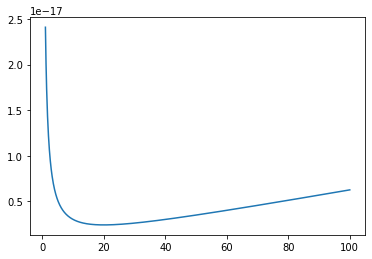

In [8]:
l = np.linspace(L.value[0], L.value[1],1000)
plt.plot(l, CRB(l,gamma.value,N.value,x.value, sig = None, ter = ter.value[1]))

In [66]:
def plot_CRB(L,gamma,N,x,ter,term):
    fig, ax = plt.subplots(1,1,figsize = (8,4), dpi = 100)
    #ax = fig.add_subplot(1, 1, 1)
    if term == 'Scan Diam':
        l = np.linspace(L[0], L[1],1000)
        for i in range(ter[0], ter[1]):
            ax.plot(l, CRB(l*1e-9,gamma,N,x*1e-9, sig = None, ter = i), label = f'{i} iterations')
    elif term == 'Phot Lim':
        n = np.linspace(N[0], N[1],1000)
        for i in range(ter[0], ter[1]):
            ax.plot(n, CRB(L*1e-9,gamma,n,x*1e-9, sig = None, ter = i), label = f'{i} iterations')
    elif term == 'offset':
        X = np.linspace(x[0], x[1],1000)
        for i in range(ter[0], ter[1]):
            ax.plot(X, CRB(L*1e-9,gamma,N,X*1e-9, sig = None, ter = i), label = f'{i} iterations')
    plt.legend(loc = 'best', fontsize = 6, ncol = 3)
    plt.show()

In [67]:
## interactive
inter = interactive(plot_CRB, L=L,gamma=gamma,N=N,x=x,ter=ter,term=term.value)
inter

interactive(children=(IntRangeSlider(value=(21, 151), continuous_update=False, description='Scan diameter [nm]…

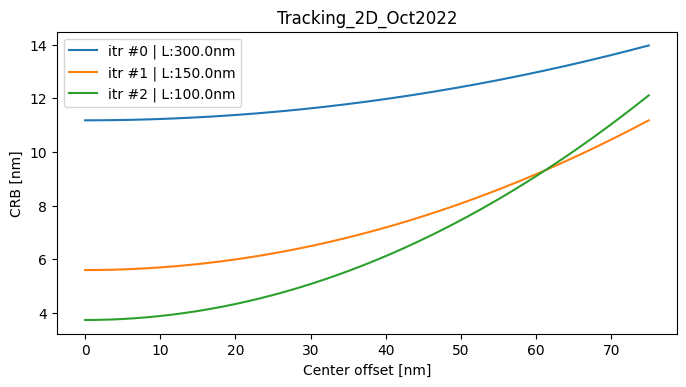

In [92]:
## official Sequences
"""Tracking_2D_Oct2022"""
def get_L(patGeoFactor, wavelength):
    return patGeoFactor * wavelength * 0.5563
L = [get_L(patGeoFactor, wavelength) for patGeoFactor,wavelength in zip([0.84, 0.42, 0.28],[642e-9, 642e-9, 642e-9])]
N = [20,20,20]
gamma = [6,6,6]
ter = 3
x = np.linspace(0,75e-9,1000)

sig = [sigma(l,g,n,x) for l,n,g in zip(L,N,gamma)]

plt.figure(figsize=(8,4), dpi =100)
plt.title('Tracking_2D_Oct2022')
plt.xlabel('Center offset [nm]')
plt.ylabel('CRB [nm]')
for i,_ in enumerate(sig):
    plt.plot(x*1e+9, _*1e+9, label =f"itr #{i} | L:{np.round(L[i]*1e+9, decimals=2)}nm")
plt.legend(loc = 'best')

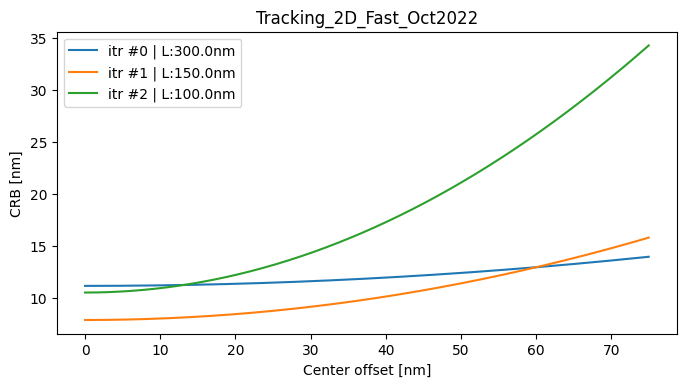

In [93]:
## official Sequences
"""Tracking_2D_Fast_Oct2022"""
def get_L(patGeoFactor, wavelength):
    return patGeoFactor * wavelength * 0.5563
L = [get_L(patGeoFactor, wavelength) for patGeoFactor,wavelength in zip([0.84, 0.42, 0.28],[642e-9, 642e-9, 642e-9])]
N = [20,10,10]
gamma = [6,6,3]
ter = 3
x = np.linspace(0,75e-9,1000)

sig = [sigma(l,g,n,x) for l,n,g in zip(L,N,gamma)]

plt.figure(figsize=(8,4), dpi =100)
plt.title('Tracking_2D_Fast_Oct2022')
plt.xlabel('Center offset [nm]')
plt.ylabel('CRB [nm]')
for i,_ in enumerate(sig):
    plt.plot(x*1e+9, _*1e+9, label =f"itr #{i} | L:{np.round(L[i]*1e+9, decimals=2)}nm")
plt.legend(loc = 'best')

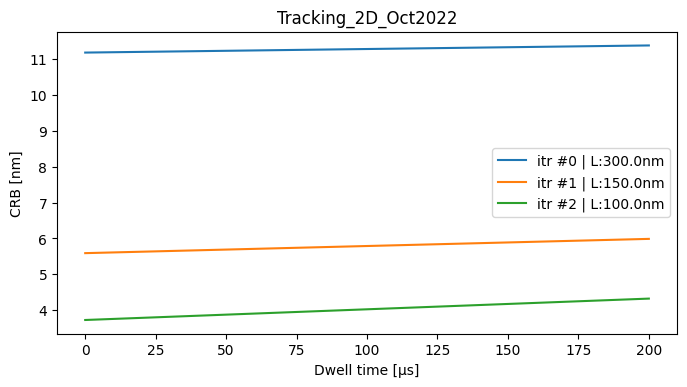

In [25]:
## official Sequences with MSD
"""Tracking_2D_Oct2022"""
def sigma_MSD(L,gamma,N,x):
    return L/(gamma*np.sqrt(N)) * (1 + (x * np.square(2/L)))
def get_L(patGeoFactor, wavelength):
    return patGeoFactor * wavelength * 0.5563
def get_offset(D,t):
    return 2*D*t
L = [get_L(patGeoFactor, wavelength) for patGeoFactor,wavelength in zip([0.84, 0.42, 0.28],[642e-9, 642e-9, 642e-9])]
N = [20,20,20]
gamma = [6,6,6]
ter = 3
t = np.linspace(0,200e-6,1000)
D = 1e-12
x = get_offset(D, t)

sig = [sigma_MSD(l,g,n,x) for l,n,g in zip(L,N,gamma)]

plt.figure(figsize=(8,4), dpi =100)
plt.title('Tracking_2D_Oct2022')
plt.xlabel('Dwell time [μs]')
plt.ylabel('CRB [nm]')
for i,_ in enumerate(sig):
    plt.plot(t*1e+6, _*1e+9, label =f"itr #{i} | L:{np.round(L[i]*1e+9, decimals=2)}nm")
plt.legend(loc = 'best')

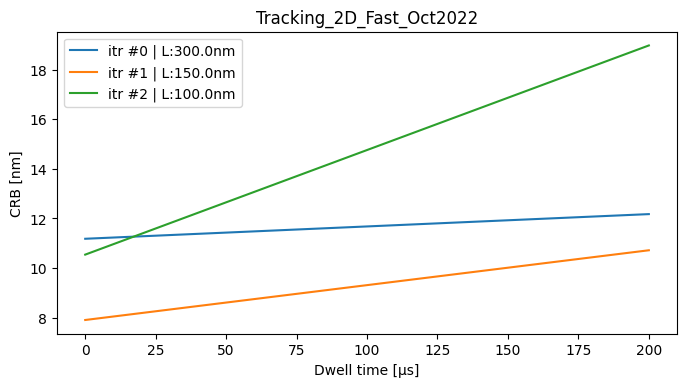

In [28]:
## official Sequences with MSD
"""Tracking_2D_Fast_Oct2022"""
def sigma_MSD(L,gamma,N,x):
    return L/(gamma*np.sqrt(N)) * (1 + (x * np.square(2/L)))
def get_L(patGeoFactor, wavelength):
    return patGeoFactor * wavelength * 0.5563
def get_offset(D,t):
    return 2*D*t
L = [get_L(patGeoFactor, wavelength) for patGeoFactor,wavelength in zip([0.84, 0.42, 0.28],[642e-9, 642e-9, 642e-9])]
N = [20,10,10]
gamma = [6,6,3]
ter = 3
t = np.linspace(0,200e-6,1000)
D = 5e-12
x = get_offset(D, t)

sig = [sigma_MSD(l,g,n,x) for l,n,g in zip(L,N,gamma)]

plt.figure(figsize=(8,4), dpi =100)
plt.title('Tracking_2D_Fast_Oct2022')
plt.xlabel('Dwell time [μs]')
plt.ylabel('CRB [nm]')
for i,_ in enumerate(sig):
    plt.plot(t*1e+6, _*1e+9, label =f"itr #{i} | L:{np.round(L[i]*1e+9, decimals=2)}nm")
plt.legend(loc = 'best')

In [17]:
def sigma_MSD(L,gamma,N,x):
    return L/(gamma*np.sqrt(N)) * (1 + (x * np.square(2/L)))
sigma_MSD(150e-9, 6, 20, 2*1e-12*100e-6)

5.788931541749455e-09

In [18]:
sigma(150e-9, 6, 20, 35e-9)

6.807584731499359e-09

In [22]:
np.sqrt(2*5e-12*100e-6)

3.162277660168379e-08

In [ ]:
def test():
    fig, ax = plt.subplots(1,1,figsize = (8,4), dpi = 100)
    n = np.linspace(N.value[0], N.value[1],1000)
    ax.plot(n, CRB(L.value,gamma.value,n,x.value, sig = None, ter = ter.value))
    plt.show()
interactive(test)

In [ ]:
fig.axes

In [ ]:
term.value

In [ ]:
CRB(L,gamma,N,x, sig = None, depth = 0, ter = 2)